## Sequential API
#### The Sequential API model is the simplest kind of keras model for neural networks and it just composed and single stack of layers connected Sequentially
#### So in this work we are building and sequential api model part os keras as which is backed by tenserflow

In [ ]:
### The initiallly building of tenserflow and keras api
import tensorflow as tf
from tensorflow import keras
print(tf.__version__) # The version of tenserflow to comfirm that it exist on system
print(keras.__version__) # The version of tenserflow.keras to comfirm that it exist on system and it is noticed by the end of the version

2.19.0
3.10.0


### Building and Image Classifier Using Sequential API
##### In this case we are building and neural network to classify the MNIST Fashion dataset and as the problem turns more significantly hard because it as the fashion items which makes each item as individual class

In [ ]:
## Importing data from keras api
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full) , (X_test,y_test) = fashion_mnist.load_data() # Already data is divided into the train and test tuple + the X , y set inside the tuple
## Lets talk that why we had did the notation like "X_train_full" because we have to divide the training data into validiation set

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Lets check the Shape of data
print(X_train_full.shape)
print(y_train_full.shape)
## Lets talk more about the data structure because it consist of 28 x 28 pixels and 60000 entries

(60000, 28, 28)
(60000,)


In [ ]:
## The each entry of the data is of 0-255 pixels intensities . So to make it easy form neural network we divide each entry by 255.0
X_valid , X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000]/255.0 , y_train_full[5000:]/255.0

In [ ]:
## Class names for the data
class_names = ["T-shirt/top" , "Trouser" , "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
## Creating model using Sequential API
model = keras.models.Sequential() # to build the Sequential Class object
model.add(keras.layers.Flatten(input_shape=[28,28])) # The input neurons for the neural nets having the input shape of image = (28 x 28) one image
model.add(keras.layers.Dense(300,activation='relu')) # The hidden layers aka Dense Layes with 300 neurons and activation function = relu
model.add(keras.layers.Dense(100,activation=keras.activations.relu))
model.add(keras.layers.Dense(10,activation='softmax')) # The Dense output layer with 10 neuron (1 neuron per class) and with activation function = softmax
## Activation function can be also written as activation = keras.activations.relu

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
## Model Summary
## It contains of Layers , parameters (trainable and non trainable) , shape os layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

##### Often model can overfit the data when data is to small
##### Eg: 784(entity) x 300 (wweights) + 300 (bias) = 23500 parameters

In [ ]:
## THe list of model layers
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
## The parameters of the layers
## 1. get_weights() - to access the weights and biases of each hidden layers
## 2. set_weights() - to set new values to the weights and biases in the hidden layers
hidden_1 = model.layers[1] # the first layer in the neural network ( Dense )
print(hidden_1 is model.get_layer('dense_1'))
weights , biases = hidden_1.get_weights()
print(weights)
print(biases)

False
[[ 0.05162039 -0.00574788 -0.01640657 ...  0.0704367   0.0039234
   0.00847263]
 [ 0.05000713 -0.00487466 -0.01537145 ...  0.0512879   0.02171724
  -0.00140537]
 [ 0.06372263 -0.0089226   0.05717961 ... -0.03075504 -0.02499365
  -0.03110845]
 ...
 [-0.01149734 -0.03342606  0.06804711 ...  0.03801715  0.00070848
   0.03414532]
 [ 0.03580393 -0.03888806  0.03206193 ... -0.04764301  0.01923014
   0.04288465]
 [-0.00143405 -0.0162361  -0.0039309  ...  0.03594077  0.03155889
  -0.02153125]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

##### So from the picture it is clearly seen that the weights are randomly initialized mostly fromt he standard normal distribution and the biases are initially zero  and it is valid
##### If we wnat to set different initialization technique we can just use kernal_initializer ( for weights) and bias_initializer ( for bias )

In [ ]:
## Compiling the model
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd', ## default learning rate is 0.01
    ## Option optimizer = keras.optimizer.SGD(lr=???) any value of learning rate
    metrics = ['accuracy']
)

## The parameter used in the complie
## 1. loss = sparse_categorical_crossentropy -> Here sparse because their are model zeros ( to avoid memory it is converted to sparse) and categorical because we had the categorical data annd the cross entropy is good for classification
## 2. optimizer = sgd (Stocastic Gradient Descent) -> and simple algorithm to get the global minima and used because the backpropogation will done to update the values of weights and biases and stocastic is fast
## 3. metrics = accuray -> Just to get the correctly classification

## Just write here the target probability case that lead to change in the parameters values

In [ ]:
## Training and Evaluating the model
history = model.fit(X_train,y_train,epochs=30,
                    validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0989 - loss: 0.0563 - val_accuracy: 0.0914 - val_loss: 0.0011
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1008 - loss: 9.2573e-04 - val_accuracy: 0.0914 - val_loss: 5.1195e-04
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.1013 - loss: 4.4389e-04 - val_accuracy: 0.0914 - val_loss: 3.3290e-04
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0996 - loss: 2.8620e-04 - val_accuracy: 0.0914 - val_loss: 2.4572e-04
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1001 - loss: 2.1553e-04 - val_accuracy: 0.0914 - val_loss: 1.9427e-04
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1003 - loss: 1.8544e-04 - val_accuracy: 0.0914 - val_loss: 1.6044e-04
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1019 - loss: 1.3182e-04 - val_accuracy: 0.0914 - val_loss: 1.3645e-04
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━

## And that is DONE !!!

In [ ]:
## The fit() method returns the history object contining the training parameter
## 1.the parameters used
print(f"Parameters for training : \n{history.params}")
## 2.the epoch - list of epoch through it went
print(f"List of epochs : \n{history.epoch}")
## 3.the extra metrics dictonary
print(f"Metrics : \n{history.history}")

Parameters for training : 
{'verbose': 'auto', 'epochs': 30, 'steps': 1719}
List of epochs : 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Metrics : 
{'accuracy': [0.10074545443058014, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372, 0.10078182071447372], 'loss': [0.013043103739619255, 0.0007495582103729248, 0.0004133071633987129, 0.0002830635057762265, 0.00021419484983198345, 0.0001717447739

In [ ]:
## Lets create the dataframe of the metrics used
import pandas as pd
metric_df = pd.DataFrame(history.history)
metric_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.100745,0.013043,0.0914,0.001074
1,0.100782,0.000750,0.0914,0.000512
2,0.100782,0.000413,0.0914,0.000333
3,0.100782,0.000283,0.0914,0.000246
4,0.100782,0.000214,0.0914,0.000194


In [ ]:
print(f"Shape of metric_df : \n{metric_df.shape}")
print(f"The Information of dataframe : \n {metric_df.info()}")
## Each row represent an epoch

Shape of metric_df : 
(30, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accuracy      30 non-null     float64
 1   loss          30 non-null     float64
 2   val_accuracy  30 non-null     float64
 3   val_loss      30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB
The Information of dataframe : 
 None


In [ ]:
## Some Extra knowledge about the fit() method
## 1. If the training set is very skewed and some classes being overrepresented and other are underrepresented the use the parameter like "class_weight"
## 2. IF you need per instance weight set parameter "sample_weight"(if both class_weight and sample_weight are provided keras multiplies them )


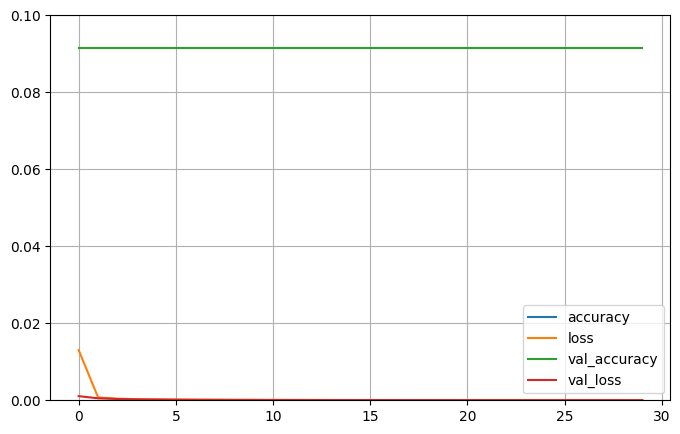

In [ ]:
## Lets plot to visulize the error
import matplotlib.pyplot as plt
metric_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,0.1) # vertical range from 0 to 1
plt.show()

In [ ]:
## Evaluate the model
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1001 - loss: 7502.3345


[7481.4951171875, 0.10000000149011612]

#### Making the predictions using the model
###### It Returns the probability assigned per class using the method model.predict()
###### It returns the class name using the method model.predict_classes()

In [ ]:
## TO see the probability per class
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
## TO see the class names
import numpy as np
y_pred = np.argmax(y_proba,axis=1)
print(y_pred)
np.array(class_names)[y_pred]

[0 0 0]


array(['T-shirt/top', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

## This is all the classification related
###### Note : here actually model is not made correctly because of the data and the random ness which was in the notebook and on the book .